## Question and why we think is important

### Relative background infomation

### Datasets

#### Dataset 1: AI Powered Job Market
some description for dataset 1

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
import sklearn
from scipy.stats import pearsonr
from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [338]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')
AI_Powered_Job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


#### Dataset 2: AI Job Threat Index
some description for dataset 2

In [339]:
AI_Job_Threat_Index = pd.read_csv('My_Data.csv')
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


-----

## Dataset 1: AI Powered Job Market

### Data Cleaning and Exploratory Data Analysis (EDA): AI Powered Job Market

In [340]:
AI_Powered_Job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [341]:
print("\nSummary statistics:")
print(AI_Powered_Job_Market.describe())


Summary statistics:
          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614


##### AI Adoption Levels Across Industries

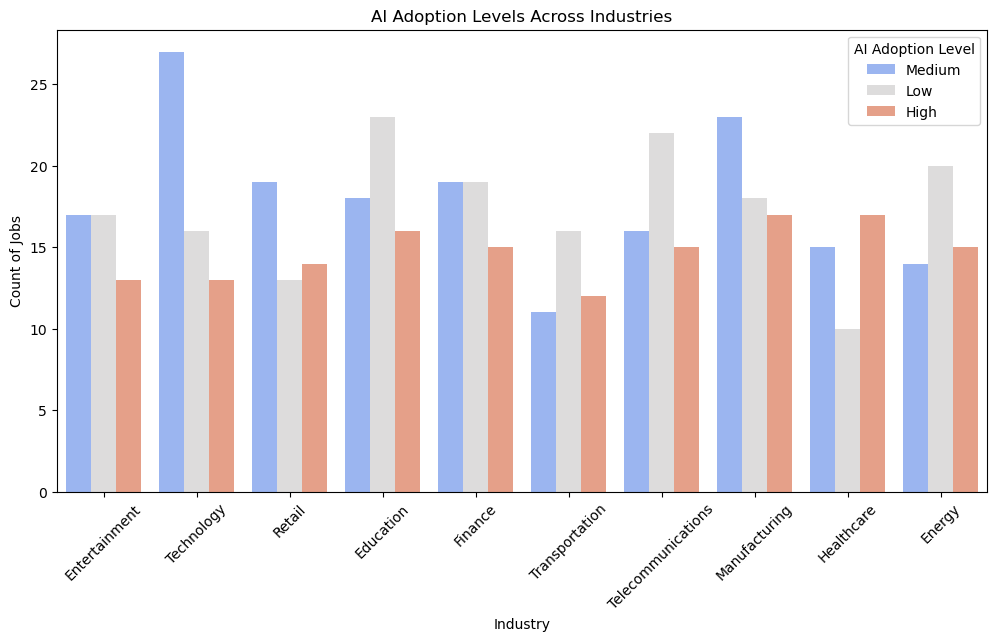

In [342]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("AI Adoption Levels Across Industries")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

##### Salary (USD) Distribution

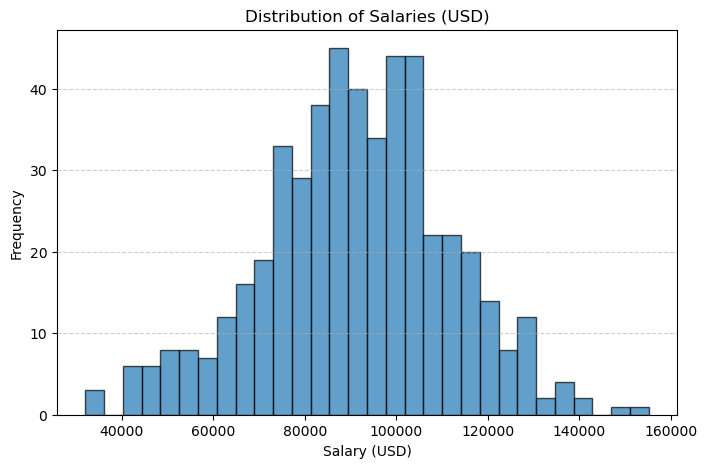

In [343]:
plt.figure(figsize=(8, 5))
plt.hist(AI_Powered_Job_Market["Salary_USD"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Salaries (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

##### Salary Distribution by AI Adoption Level

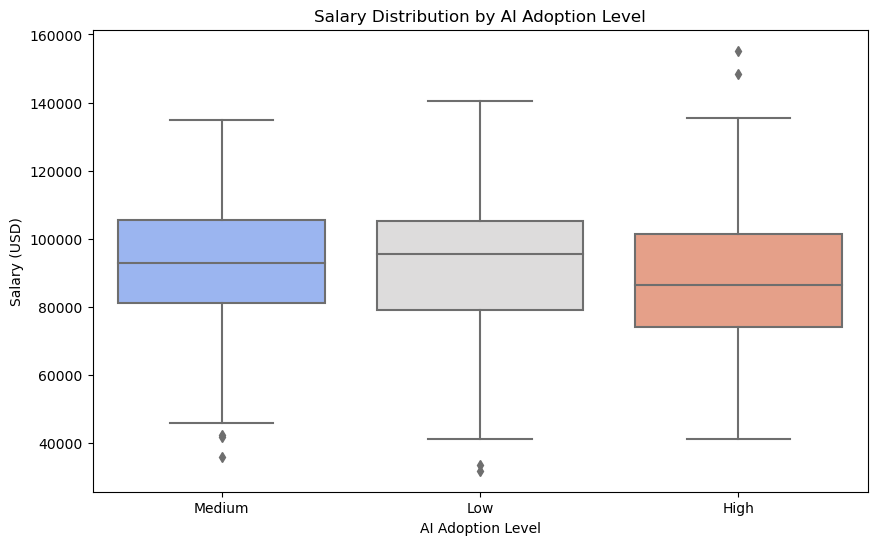

In [344]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", y="Salary_USD", palette="coolwarm")
plt.title("Salary Distribution by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Salary (USD)")
plt.show()

##### Salary Comparison by Automation Risk Level

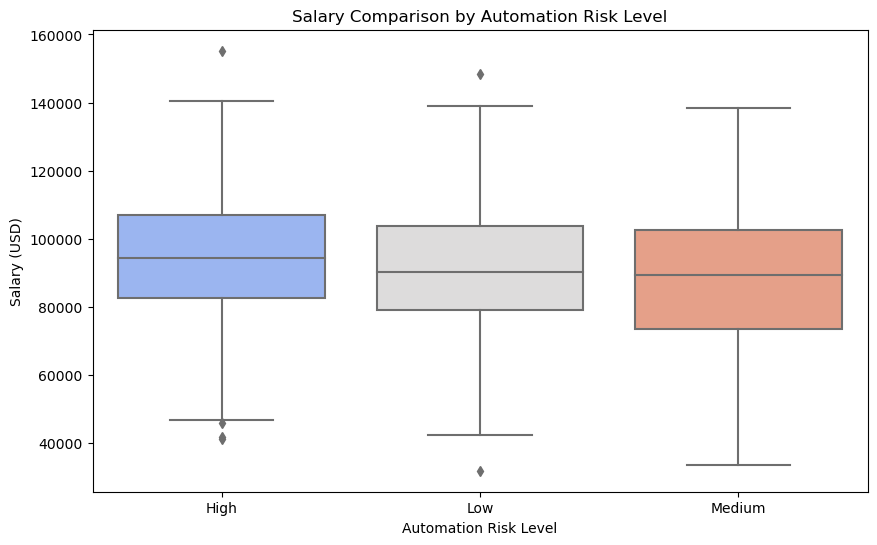

In [345]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="Automation_Risk", y="Salary_USD", palette="coolwarm")
plt.title("Salary Comparison by Automation Risk Level")
plt.xlabel("Automation Risk Level")
plt.ylabel("Salary (USD)")
plt.show()

##### Averge salary of each job

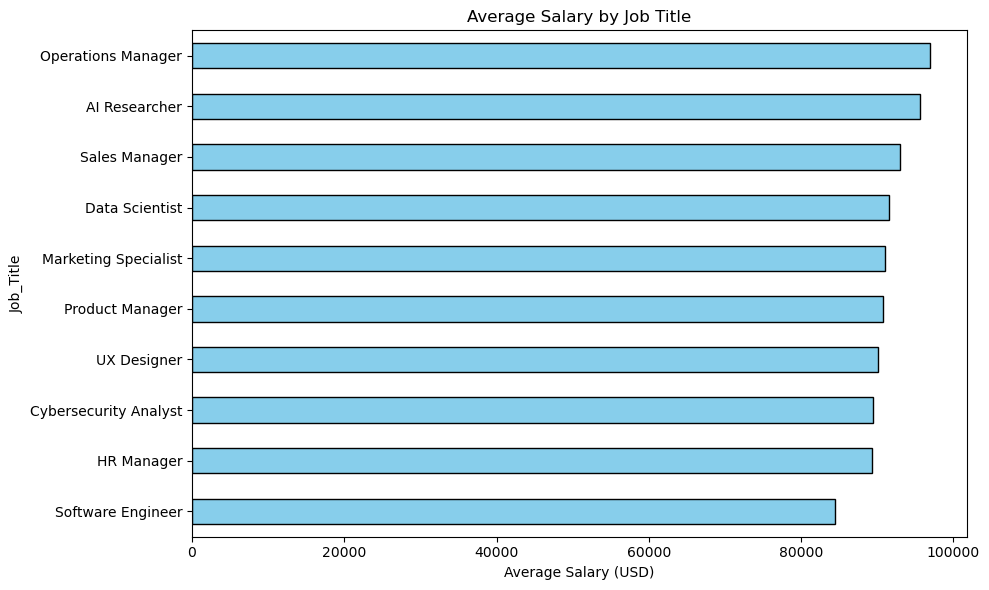

In [346]:
mean_salary = AI_Powered_Job_Market.groupby('Job_Title')['Salary_USD'].mean().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
mean_salary.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average Salary (USD)')
plt.title('Average Salary by Job Title')
plt.tight_layout()
plt.show()

##### Job Growth Projection Across Industries

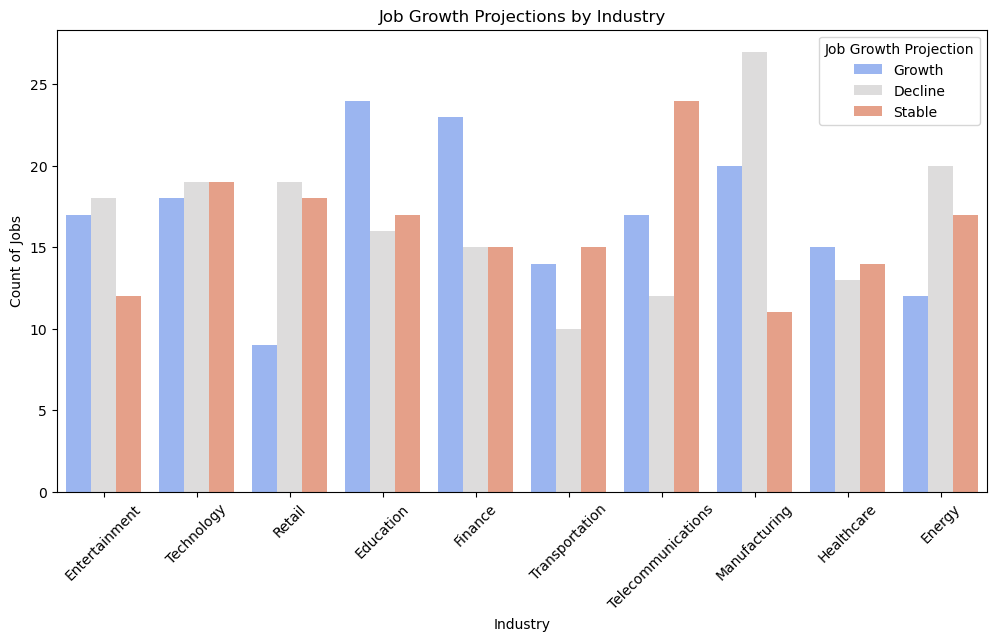

In [347]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("Job Growth Projections by Industry")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()

##### Relationship Between AI Adoption and Job Growth Projection

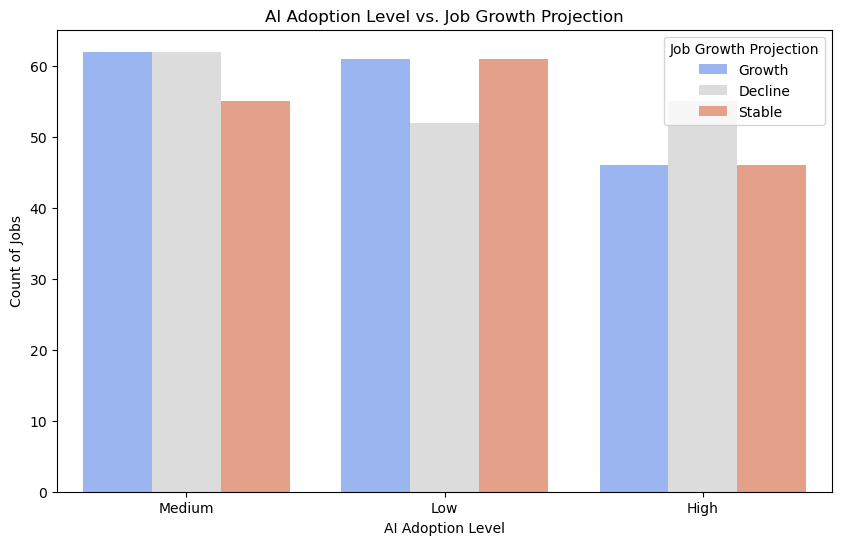

In [348]:
plt.figure(figsize=(10, 6))
sns.countplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("AI Adoption Level vs. Job Growth Projection")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()


##### Distribution of Remote-Friendly Jobs

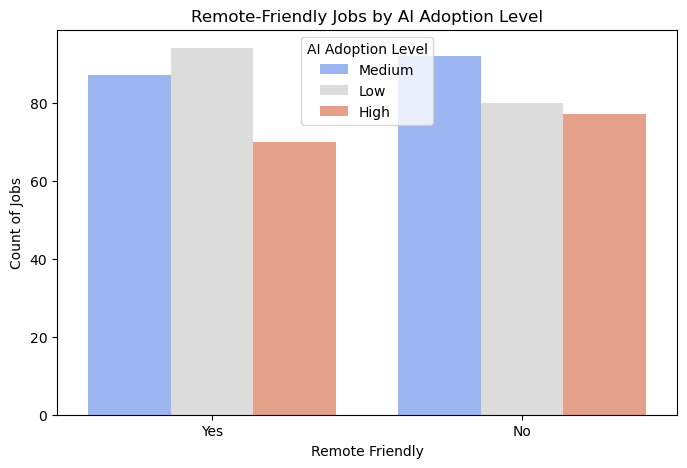

In [349]:
plt.figure(figsize=(8, 5))
sns.countplot(data=AI_Powered_Job_Market, x="Remote_Friendly", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("Remote-Friendly Jobs by AI Adoption Level")
plt.xlabel("Remote Friendly")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

##### Most In-Demand Skills by AI Adoption Level

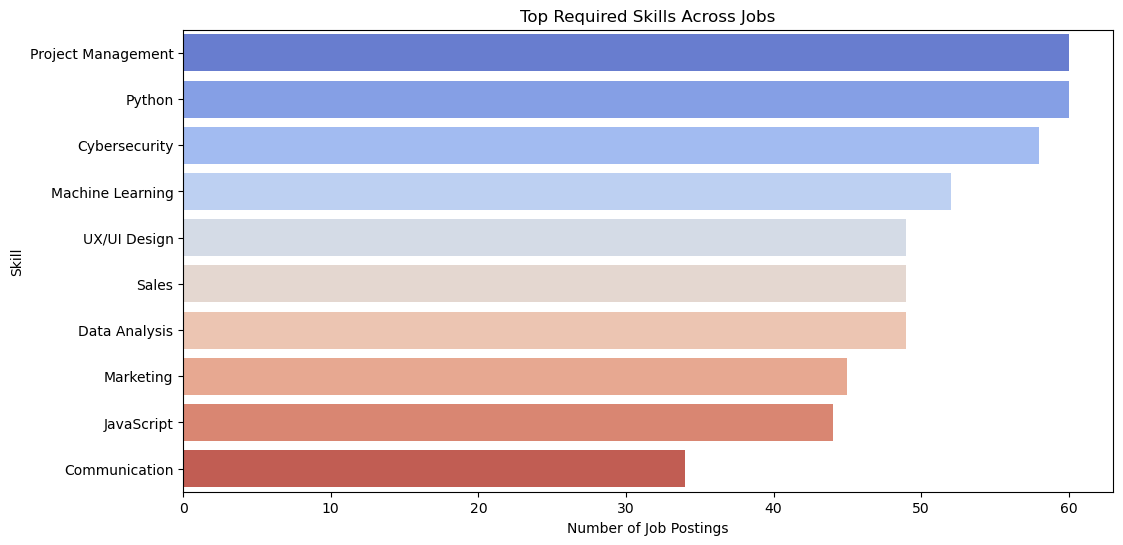

In [350]:
top_skills = AI_Powered_Job_Market["Required_Skills"].value_counts().nlargest(15)  # Get top 15 skills
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="coolwarm")
plt.title("Top Required Skills Across Jobs")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.show()

##### Average Salary by Industry and AI Adoption Level

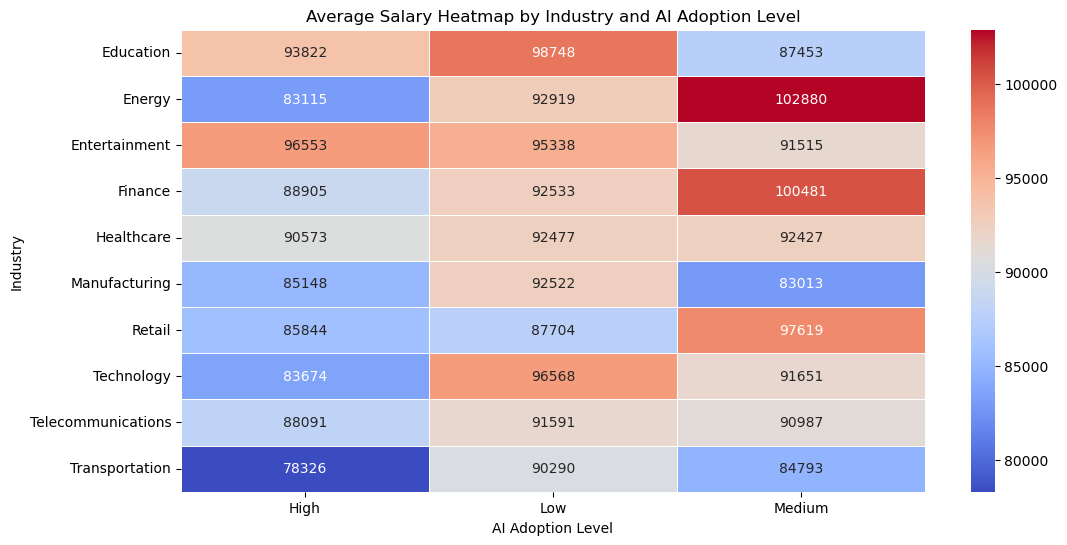

In [351]:
salary_pivot = AI_Powered_Job_Market.pivot_table(values="Salary_USD", index="Industry", columns="AI_Adoption_Level", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(salary_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Salary Heatmap by Industry and AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Industry")
plt.show()


In [352]:
decline_counts = AI_Powered_Job_Market[AI_Powered_Job_Market['Job_Growth_Projection'] == 'Decline'].groupby('Job_Title')['Job_Growth_Projection'].count()

total_counts = AI_Powered_Job_Market.groupby('Job_Title')['Job_Growth_Projection'].count()

decline_fraction = decline_counts / total_counts

decline_fraction 

Job_Title
AI Researcher            0.313725
Cybersecurity Analyst    0.345455
Data Scientist           0.370968
HR Manager               0.385965
Marketing Specialist     0.479167
Operations Manager       0.159091
Product Manager          0.256410
Sales Manager            0.326531
Software Engineer        0.292683
UX Designer              0.388889
Name: Job_Growth_Projection, dtype: float64

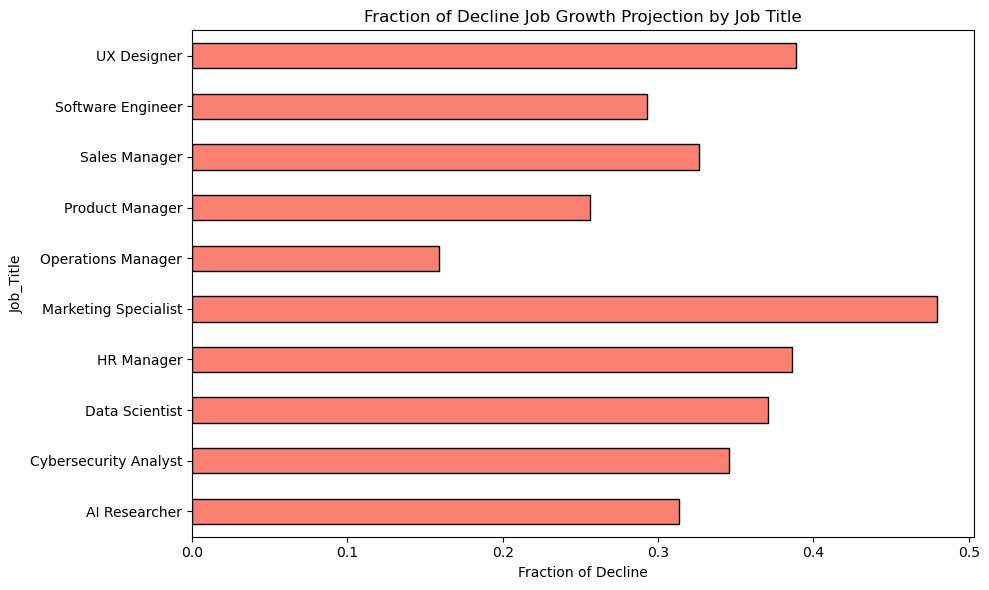

In [353]:
plt.figure(figsize=(10, 6))
decline_fraction.plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('Fraction of Decline')
plt.title('Fraction of Decline Job Growth Projection by Job Title')
plt.tight_layout()
plt.show()

### Hypothesis Testing: AI Powered Job Market Data

Encode Categories:

In [354]:
AI_Powered_Job_Market["AI_Adoption_Level"] = pd.Categorical(AI_Powered_Job_Market["AI_Adoption_Level"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Automation_Risk"] = pd.Categorical(AI_Powered_Job_Market["Automation_Risk"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Job_Growth_Projection"] = pd.Categorical(AI_Powered_Job_Market["Job_Growth_Projection"], categories=["Decline", "Stable", "Growth"], ordered=True)

#### T-Test (AI Job Salary vs. Non-AI Job Salary) --> Two-Tailed Test

We are testing whether there is a statistically significant difference in salaries between jobs with high AI adoption and jobs with low AI adoption.

Null: The mean salary of high AI adoption jobs is equal to the mean salary of low AI adoption jobs

ALternate: The mean salary of high AI adoption jobs is different from the mean salary of low AI adoption jobs.

In [355]:
ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Salary_USD"]
non_ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Salary_USD"]

t_stat, p_value = stats.ttest_ind(ai_jobs, non_ai_jobs, nan_policy='omit')

print("T-Test: Salary in AI vs. Non-AI Jobs")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis. \nThere is a statistically significant difference in salaries \nbetween high AI adoption jobs and low AI adoption jobs.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no statistically significant difference in salaries between high AI adoption jobs and low AI adoption jobs.")

T-Test: Salary in AI vs. Non-AI Jobs
T-Statistic: -2.4602, P-Value: 0.0144

Conclusion: Reject the null hypothesis. 
There is a statistically significant difference in salaries 
between high AI adoption jobs and low AI adoption jobs.


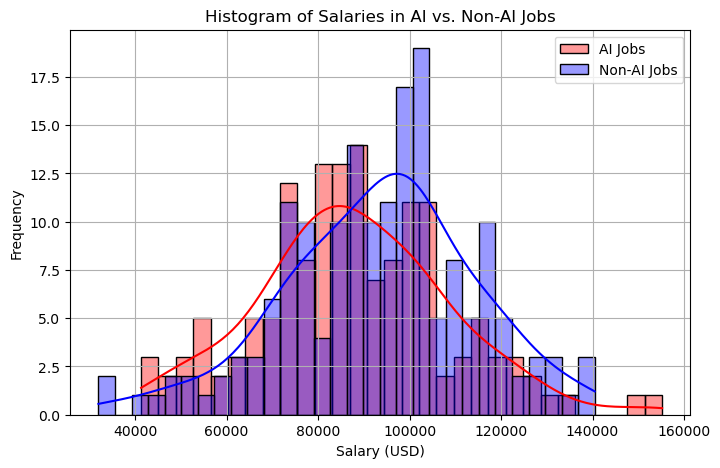

In [356]:
plt.figure(figsize=(8, 5))
sns.histplot(ai_jobs, bins=30, kde=True, label="AI Jobs", alpha=0.4, color='red')
sns.histplot(non_ai_jobs, bins=30, kde=True, label="Non-AI Jobs", alpha=0.4, color='blue')
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries in AI vs. Non-AI Jobs")
plt.legend()
plt.grid(True)
plt.show()


#### Chi-Squared Test: AI Adoption vs. Job Growth Projection

We are testing whether there is a significant association between AI adoption levels and job growth projections.

Null: There is no association between AI adoption level and job growth projection (job growth projection is independent of AI adoption)

Alternate: There is a significant association between AI adoption level and job growth projection (AI adoption may influence job growth projections)

In [357]:
contingency_table = pd.crosstab(AI_Powered_Job_Market["AI_Adoption_Level"], AI_Powered_Job_Market["Job_Growth_Projection"])

In [358]:
contingency_table

Job_Growth_Projection,Decline,Stable,Growth
AI_Adoption_Level,,,
Low,52,61,61
Medium,62,55,62
High,55,46,46


In [359]:
chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test: AI Adoption vs. Job Growth Projection")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {chi2_p_value:.4f}")

if chi2_p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis. There is a significant association between AI adoption level and job growth projection.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. \nThere is no significant association between a job's \nAI adoption level and job growth projection.")

Chi-Square Test: AI Adoption vs. Job Growth Projection
Chi-Square Statistic: 2.3761, P-Value: 0.6670

Conclusion: Fail to reject the null hypothesis. 
There is no significant association between a job's 
AI adoption level and job growth projection.


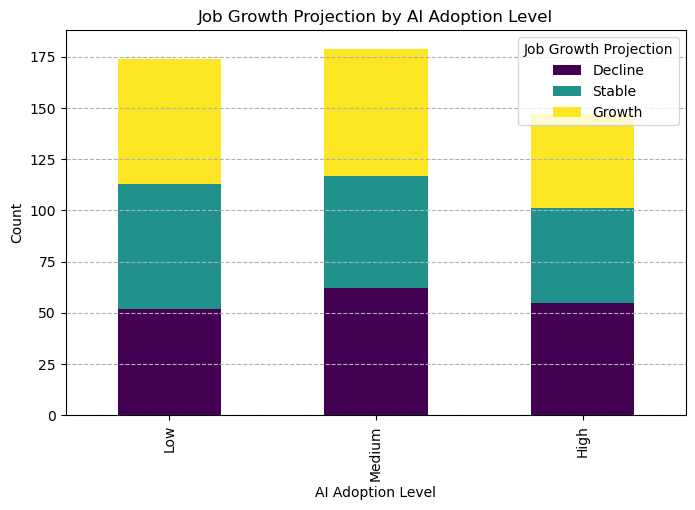

In [360]:
contingency_table.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Job Growth Projection by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count")
plt.legend(title="Job Growth Projection")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Mann-Whitney U test

We are testing whether the distribution of job postings across industries differs significantly ebtween AI-heavy vs traditional / low AI-adoption industries.

Null: The distribution of job postings across industries is the same between AI-heavy and traditional industries (AI adoption does not significantly affect the distribution of job postings across industries)

Alternate: The distribution of job postings across industries differs between AI-heavy and traditional industries (some industries might have significantly more AI-heavy job postings compared to traditional jobs)

In [361]:
ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Industry"].value_counts()
non_ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Industry"].value_counts()

common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

mwu_stat, mwu_p_value = stats.mannwhitneyu(ai_industries, non_ai_industries, alternative="two-sided")

print("Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries")
print(f"Test/U-Statistic: {mwu_stat:.4f}, P-Value: {mwu_p_value:.4f}")

if mwu_p_value < 0.10:
    print("\nConclusion: Reject the null hypothesis (90% significance). \nThe distribution of job postings across industries \ndiffers significantly between AI-heavy \nand traditional industries. However, \nat at 95% significance, we would fail to reject the null (not significantly different).")
else:
    print("\nConclusion: Fail to reject the null hypothesis (90% significance). The distribution of job postings across industries is not significantly different between AI-heavy and traditional industries.")


Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries
Test/U-Statistic: 24.0000, P-Value: 0.0525

Conclusion: Reject the null hypothesis (90% significance). 
The distribution of job postings across industries 
differs significantly between AI-heavy 
and traditional industries. However, 
at at 95% significance, we would fail to reject the null (not significantly different).


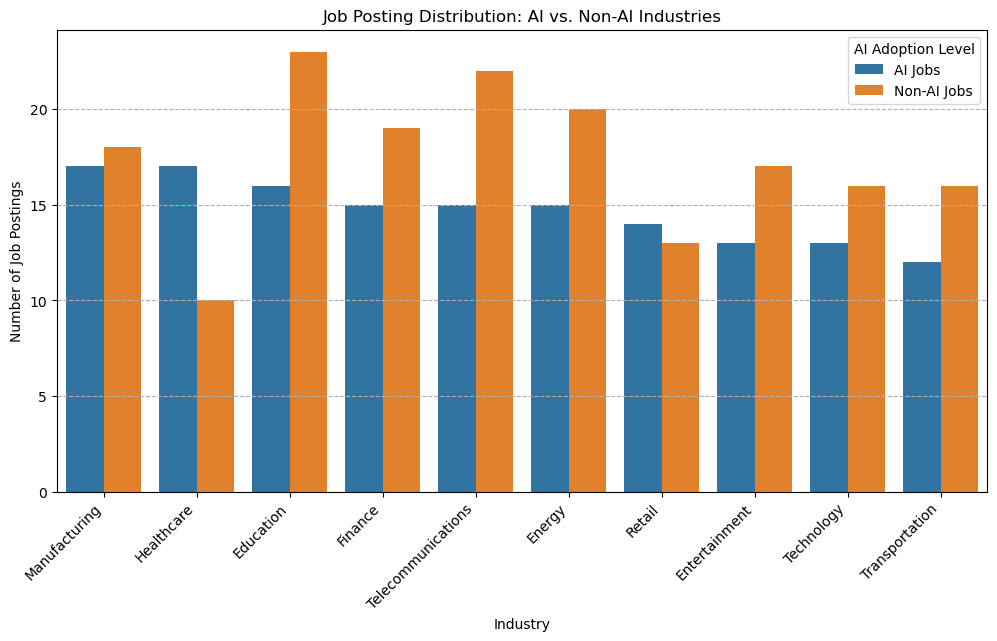

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

industry_data = pd.DataFrame({
    "Industry": common_industries,
    "AI Jobs": ai_industries.values,
    "Non-AI Jobs": non_ai_industries.values
}).melt(id_vars="Industry", var_name="AI_Adoption", value_name="Job Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_data, x="Industry", y="Job Count", hue="AI_Adoption")
plt.xticks(rotation=45, ha="right")
plt.title("Job Posting Distribution: AI vs. Non-AI Industries")
plt.xlabel("Industry")
plt.ylabel("Number of Job Postings")
plt.legend(title="AI Adoption Level")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution

We are testing to see whether the distribution of job growth projections differs significantly between AI-heavy and non-AI industries.

Null: The distribution of job growth projections is the same for AI-heavy and non-AI jobs (AI adoption does not significantly impact job growth trends)

Alternate: The job growth distribution differs between AI-heavy and non-AI jobs (AI adoption is influencing job growth to a point where it makes its distribution different from non-AI jobs)

In [363]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}
AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = stats.ks_2samp(ai_job_growth, non_ai_job_growth)

print("Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution")
print(f"K-S Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")

if ks_p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis. The distribution of job growth projections is significantly different between AI-heavy and non-AI jobs.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. \nThe job growth distribution is not significantly different \nbetween AI-heavy and non-AI jobs.")

Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution
K-S Statistic: 0.0753, P-Value: 0.7190

Conclusion: Fail to reject the null hypothesis. 
The job growth distribution is not significantly different 
between AI-heavy and non-AI jobs.


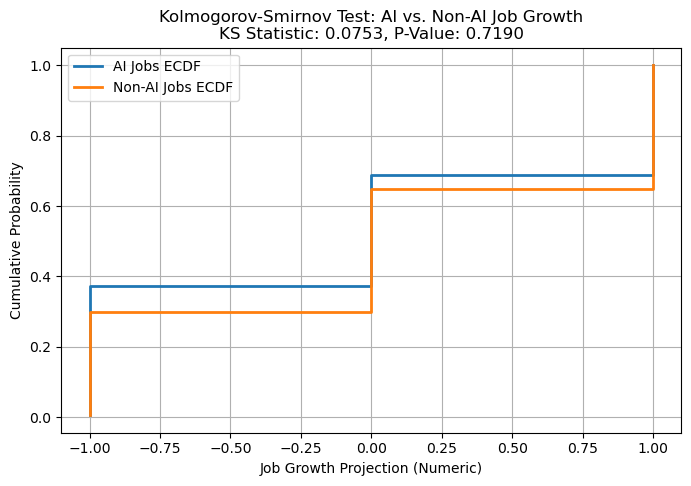

In [364]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}

AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = ks_2samp(ai_job_growth, non_ai_job_growth)

ai_sorted = np.sort(ai_job_growth)
non_ai_sorted = np.sort(non_ai_job_growth)
ai_ecdf = np.arange(1, len(ai_sorted) + 1) / len(ai_sorted)
non_ai_ecdf = np.arange(1, len(non_ai_sorted) + 1) / len(non_ai_sorted)

plt.figure(figsize=(8, 5))
plt.plot(ai_sorted, ai_ecdf, label="AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.plot(non_ai_sorted, non_ai_ecdf, label="Non-AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.xlabel("Job Growth Projection (Numeric)")
plt.ylabel("Cumulative Probability")
plt.title(f"Kolmogorov-Smirnov Test: AI vs. Non-AI Job Growth\nKS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")
plt.legend()
plt.grid(True)
plt.show()

### Feature Selection, OLS Regression Modeling (AI Powered Job Market Data)

In [365]:
AI_Powered_Job_Market.drop(columns=["Job_Growth_Numeric"], inplace=True)

categorical_cols = [
    "Job_Title", "Industry", "Location", "Required_Skills", 
    "Remote_Friendly", "Company_Size", "AI_Adoption_Level", 
    "Automation_Risk", "Job_Growth_Projection"
]

for col in categorical_cols:
    AI_Powered_Job_Market[col] = AI_Powered_Job_Market[col].astype("category")

AI_Powered_Job_Market = pd.get_dummies(AI_Powered_Job_Market, drop_first=True)

print(AI_Powered_Job_Market.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Salary_USD                          500 non-null    float64
 1   Job_Title_Cybersecurity Analyst     500 non-null    uint8  
 2   Job_Title_Data Scientist            500 non-null    uint8  
 3   Job_Title_HR Manager                500 non-null    uint8  
 4   Job_Title_Marketing Specialist      500 non-null    uint8  
 5   Job_Title_Operations Manager        500 non-null    uint8  
 6   Job_Title_Product Manager           500 non-null    uint8  
 7   Job_Title_Sales Manager             500 non-null    uint8  
 8   Job_Title_Software Engineer         500 non-null    uint8  
 9   Job_Title_UX Designer               500 non-null    uint8  
 10  Industry_Energy                     500 non-null    uint8  
 11  Industry_Entertainment              500 non-n

### Testing Multiple Linear Regression with All Covariates

In [366]:
AI_Powered_Job_Market.columns = (
    AI_Powered_Job_Market.columns
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("/", "_")
)
feature_columns = AI_Powered_Job_Market.columns.drop("Salary_USD")

formula = "Salary_USD ~ " + " + ".join(feature_columns)

full_model = smf.ols(formula, data=AI_Powered_Job_Market).fit()

print(full_model.summary())


                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.231
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.152
Time:                        15:52:21   Log-Likelihood:                -5644.4
No. Observations:                 500   AIC:                         1.138e+04
Df Residuals:                     454   BIC:                         1.157e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Using Covariates that are Statistically Significant at the 10% Level

In [367]:
significant_vars = full_model.pvalues[full_model.pvalues < 0.10]

if "Intercept" in significant_vars.index:
    significant_vars = significant_vars.drop("Intercept")

print("The covariates that are statistically significant at the 15% significance level are:")
print('\n'.join([sig_col for sig_col in significant_vars.index]))

significant_formula = "Salary_USD ~ " + " + ".join(significant_vars.index)
significant_formula_print = "Salary_USD ~ " + " + \n".join(significant_vars.index)
print("\nRefined Model Formula:\n", significant_formula_print)

The covariates that are statistically significant at the 15% significance level are:
Job_Title_Software_Engineer
Industry_Manufacturing
Industry_Transportation
AI_Adoption_Level_High
Automation_Risk_Medium
Required_Skills_JavaScript

Refined Model Formula:
 Salary_USD ~ Job_Title_Software_Engineer + 
Industry_Manufacturing + 
Industry_Transportation + 
AI_Adoption_Level_High + 
Automation_Risk_Medium + 
Required_Skills_JavaScript


In [368]:
statistically_significant_model = smf.ols(significant_formula, data=AI_Powered_Job_Market).fit()
print(statistically_significant_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     5.454
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.77e-05
Time:                        15:52:31   Log-Likelihood:                -5657.1
No. Observations:                 500   AIC:                         1.133e+04
Df Residuals:                     493   BIC:                         1.136e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

#### Check Multicollinearity of Statistically Significant Features

In [369]:
exog = statistically_significant_model.model.exog
names = statistically_significant_model.model.exog_names

for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')


VIF: Job_Title_Software_Engineer:  1.004
VIF: Industry_Manufacturing:  1.016
VIF: Industry_Transportation:  1.019
VIF: AI_Adoption_Level_High:  1.005
VIF: Automation_Risk_Medium:  1.010
VIF: Required_Skills_JavaScript:  1.006


### Running Backward Selection with BIC Criterion (Starting with Full Model)

In [370]:
def criterion_aic(formula, df):
    model = smf.ols(formula, df).fit()
    return model.aic

def criterion_bic(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):
    """
    Identify the worst column to remove based on the given criterion.
    REMEMBER: The smaller the criterion, the better the model.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    already_selected_columns (set): The set of currently selected columns.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    tuple: The worst column to remove and its criterion value.
    """

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for column in already_selected_columns:
        new_columns = already_selected_columns - {column}
        formula = f'{response} ~ {" + ".join(new_columns)}' if new_columns else f'{response} ~ 1'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = column
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):
    """
    Perform backward selection to find the optimal model based on the given criterion.
    REMEMBER: The smallest criterion value is considered the best model fit.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    set: The set of selected columns in the optimal model.
    """

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best_criterion = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential_column, current_criterion = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current_criterion <= best_criterion:
            already_selected_columns = already_selected_columns - {potential_column}
            best_criterion = current_criterion
            print(f'Criterion: {best_criterion}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

In [371]:
selected_features = backward(AI_Powered_Job_Market, criterion_bic, response="Salary_USD")
print("Selected Features:", selected_features)


Criterion: 11568.43166796542
Criterion: 11562.225637660153
Criterion: 11556.0235811842
Criterion: 11549.82206281629
Criterion: 11543.630083419166
Criterion: 11537.447456341148
Criterion: 11531.29596481062
Criterion: 11525.174618486259
Criterion: 11519.087488705287
Criterion: 11512.9991810823
Criterion: 11506.906522042746
Criterion: 11500.854559224023
Criterion: 11494.80886278098
Criterion: 11488.718368745293
Criterion: 11482.686190569699
Criterion: 11476.679976279811
Criterion: 11470.720406359042
Criterion: 11464.790085338038
Criterion: 11458.82731190615
Criterion: 11452.871749893922
Criterion: 11446.963661385758
Criterion: 11441.122316266354
Criterion: 11435.266870480371
Criterion: 11429.456829054048
Criterion: 11424.307930395416
Criterion: 11419.418081925383
Criterion: 11414.55473368748
Criterion: 11409.502806032207
Criterion: 11404.136873525455
Criterion: 11398.684908906944
Criterion: 11393.717477824865
Criterion: 11388.931455537624
Criterion: 11384.070474574988
Criterion: 11379.282

#### Running OLS using Selected Features from Backward Selection + BIC Criterion

In [372]:
backwards_formula = "Salary_USD ~ Required_Skills_JavaScript + Automation_Risk_Medium"

backwards_model = smf.ols(backwards_formula, data=AI_Powered_Job_Market).fit()

print(backwards_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.075
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           0.000934
Time:                        15:53:06   Log-Likelihood:                -5666.1
No. Observations:                 500   AIC:                         1.134e+04
Df Residuals:                     497   BIC:                         1.135e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Check Multicollinearity of Backwards-Selected Features

In [373]:
exog = backwards_model.model.exog
names = backwards_model.model.exog_names

for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: Required_Skills_JavaScript:  1.001
VIF: Automation_Risk_Medium:  1.001


Findings: Despite proper preprocessing (i.e. encoding categories into numerical values), testing different OLS regression models (full, statistically significant features, and backward-selected + BIC-criterion features), and finding for multicollinearity in our features (which were low, where the features had a score around ~1), it seems that the covariates are simply not good predictors alone in predicting Salary (USD) due to low R^2. Possible reasons for this may include other factors not present in the dataset that has major influence on salary, such as years of experience, educational background, and company funding. We could utilize other non-linear methods to estimate the numerical value that is Salary USD, such as decision trees or random forest, but that is out the scope of this class.

## Binary Classification: Predicting Jobs that are at Low or High Risk of Automation

### Logistic Regression: Predict Whether a Job is at Low or High Risk of Automation

In [374]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')

#### Preprocessing

In [375]:
AI_Powered_Job_Market = AI_Powered_Job_Market[AI_Powered_Job_Market["Automation_Risk"] != "Medium"]

categorical_cols = [
    "AI_Adoption_Level", "Industry", "Company_Size", 
    "Job_Growth_Projection", "Remote_Friendly"
]

for col in categorical_cols:
    AI_Powered_Job_Market[col] = AI_Powered_Job_Market[col].astype("category")

AI_Powered_Job_Market["Automation_Risk_Binary"] = AI_Powered_Job_Market["Automation_Risk"].apply(
    lambda x: 1 if x == "High" else 0
)

df_encoded = pd.get_dummies(AI_Powered_Job_Market, drop_first=True)

### Using all Features for Logistic Regression

In [376]:
X = df_encoded.drop(columns=["Automation_Risk_Binary", "Automation_Risk_Low"]) # remove directly correlated covariates (prevent data leakage)
y = df_encoded["Automation_Risk_Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.439
Precision: 0.375
Recall: 0.414
F1 Score: 0.393


Using all features are not that good.

#### Using Backward Selection to Select Features for Logistic Regression (AIC and BIC criterion)

In [377]:
import statsmodels.formula.api as smf

def criterion_aic(formula, df):
    """
    Calculate AIC for a logistic regression model.
    """
    model = smf.logit(formula, df).fit(disp=0)
    return model.aic

def criterion_bic(formula, df):
    """
    Calculate the BIC for a given logistic regression model formula and dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.logit(formula, df).fit(disp=0)
    return model.bic

def remove(df, already_selected_columns, criterion, response='y'):
    """
    Identify the worst column to remove based on the given criterion.
    REMEMBER: The smaller the criterion, the better the model.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    already_selected_columns (set): The set of currently selected columns.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    tuple: The worst column to remove and its criterion value.
    """

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for column in already_selected_columns:
        new_columns = already_selected_columns - {column}
        formula = f'{response} ~ {" + ".join(new_columns)}' if new_columns else f'{response} ~ 1'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = column
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):
    """
    Perform backward selection to find the optimal model based on the given criterion.
    REMEMBER: The smallest criterion value is considered the best model fit.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    set: The set of selected columns in the optimal model.
    """

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best_criterion = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential_column, current_criterion = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current_criterion <= best_criterion:
            already_selected_columns = already_selected_columns - {potential_column}
            best_criterion = current_criterion
            print(f'Criterion: {best_criterion}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

In [378]:
df_encoded.columns

Index(['Salary_USD', 'Automation_Risk_Binary',
       'Job_Title_Cybersecurity Analyst', 'Job_Title_Data Scientist',
       'Job_Title_HR Manager', 'Job_Title_Marketing Specialist',
       'Job_Title_Operations Manager', 'Job_Title_Product Manager',
       'Job_Title_Sales Manager', 'Job_Title_Software Engineer',
       'Job_Title_UX Designer', 'Industry_Energy', 'Industry_Entertainment',
       'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing',
       'Industry_Retail', 'Industry_Technology', 'Industry_Telecommunications',
       'Industry_Transportation', 'Company_Size_Medium', 'Company_Size_Small',
       'Location_Dubai', 'Location_London', 'Location_New York',
       'Location_Paris', 'Location_San Francisco', 'Location_Singapore',
       'Location_Sydney', 'Location_Tokyo', 'Location_Toronto',
       'AI_Adoption_Level_Low', 'AI_Adoption_Level_Medium',
       'Automation_Risk_Low', 'Required_Skills_Cybersecurity',
       'Required_Skills_Data Analysis', 'Require

In [380]:
correlations = df_encoded.corr()['Automation_Risk_Binary'].sort_values(ascending=False)

print("Features Causing Perfect Separation (we need to remove these...):")
print(correlations[abs(correlations) >= 0.99])

Features Causing Perfect Separation (we need to remove these...):
Automation_Risk_Binary    1.0
Automation_Risk_Low      -1.0
Name: Automation_Risk_Binary, dtype: float64


##### Backwards + BIC

In [381]:
df_encoded = df_encoded.drop(columns=['Automation_Risk_Low'])
df_encoded.columns = (
    df_encoded.columns
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("/", "_")
)
bic_selected_features = backward(df_encoded, criterion_bic, response="Automation_Risk_Binary")
print("\nFinal Selected Features:", bic_selected_features)

Criterion: 667.3909276374405
Criterion: 661.6025122888026
Criterion: 655.8142445676879
Criterion: 650.0269073404958
Criterion: 644.2476420936778
Criterion: 638.4683555079433
Criterion: 632.7014070622126
Criterion: 626.9655870203613
Criterion: 621.2939466860613
Criterion: 615.6458156048755
Criterion: 610.0455623075645
Criterion: 604.4135868330775
Criterion: 598.8530306210246
Criterion: 593.2595558853023
Criterion: 587.7933745871983
Criterion: 582.3065989557992
Criterion: 576.8614906486638
Criterion: 571.3888915416118
Criterion: 565.9508679435245
Criterion: 560.6168441660847
Criterion: 555.269401510349
Criterion: 549.9450885154529
Criterion: 544.8364281947213
Criterion: 539.8195049770292
Criterion: 534.8793437107867
Criterion: 529.6812401798904
Criterion: 524.4493872342634
Criterion: 519.1395434339288
Criterion: 514.1632795678681
Criterion: 509.2554067029033
Criterion: 504.7014993316641
Criterion: 500.0293972388874
Criterion: 495.4612339986252
Criterion: 491.0376543497032
Criterion: 486.

Findings: It seems that using BIC-criterion and backwards selection removes all features, meaning that no features significantly improve the model. Since the criterion removes all features, it suggests that the model with no predictors is preferable. This may indicate that none of the covariates in this dataset alone provide enough predictive power for a job's automation risk. Instead, we'll try Backwards + AIC, which penalizes less.

#### Backwards + AIC

In [382]:
aic_selected_features = backward(df_encoded, criterion_aic, response="Automation_Risk_Binary")
print("\nFinal Selected Features:", aic_selected_features)

Criterion: 500.6326801179614
Criterion: 498.6342249402207
Criterion: 496.6359173900032
Criterion: 494.63854033370836
Criterion: 492.64923525778767
Criterion: 490.6599088429505
Criterion: 488.682920568117
Criterion: 486.737060697163
Criterion: 484.8553805337602
Criterion: 482.9972096234715
Criterion: 481.18691649705795
Criterion: 479.3449011934681
Criterion: 477.5743051523125
Criterion: 475.77079058748745
Criterion: 474.0945694602807
Criterion: 472.39775399977884
Criterion: 470.7426058635407
Criterion: 469.0599669273859
Criterion: 467.4119035001959
Criterion: 465.8678398936533
Criterion: 464.31035740881487
Criterion: 462.7760045848161
Criterion: 461.4573044349817
Criterion: 460.23034138818684
Criterion: 459.08014029284163
Criterion: 457.67199693284266
Criterion: 456.2301041581129
Criterion: 454.7102205286755
Criterion: 453.5239168335121
Criterion: 452.4060041394445
Criterion: 451.64205693910253
Criterion: 450.7599150172231
Criterion: 449.9817119478581
Criterion: 449.34809246983343
Crite

Findings: It seems that using AIC-criterion and backwards selection chose some important features, having a lower penalty in comparison to BIC (which has a harsher penalty). AIC prioritizes better prediction over model simplicity, so this makes sense. Let's test the AIC selected features.

In [383]:
X_aic_selected = df_encoded[list(aic_selected_features)]

X_train_aic, X_test_aic, y_train, y_test = train_test_split(X_aic_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_aic = scaler.fit_transform(X_train_aic)
X_test_aic = scaler.transform(X_test_aic)

logreg_aic = LogisticRegression(max_iter=500, class_weight='balanced')
logreg_aic.fit(X_train_aic, y_train)

y_pred_aic = logreg_aic.predict(X_test_aic)

accuracy = accuracy_score(y_test, y_pred_aic)
precision = precision_score(y_test, y_pred_aic)
recall = recall_score(y_test, y_pred_aic)
f1 = f1_score(y_test, y_pred_aic)

print("Logistic Regression Model Performance After AIC Feature Selection:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Logistic Regression Model Performance After AIC Feature Selection:
Accuracy: 0.606
Precision: 0.537
Recall: 0.759
F1 Score: 0.629


In [384]:
feature_names = list(aic_selected_features)
coefficients = logreg_aic.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
3,Required_Skills_Sales,0.203757
1,Location_Singapore,0.158663
2,Job_Title_Data_Scientist,-0.216285
0,Company_Size_Medium,-0.245363
4,Job_Title_Operations_Manager,-0.331104


Using the AIC-selected features, there seems to be some improvement across all metrics. This is due to AIC keeping the strongest covariates, which in turn makes the predictions of jobs having high or low automation risk more reliable and generalizable.

#### Self-Selected Features for Logistic Regression

We also decided to choose covariates that intuitively make sense with automation risk. This includes the categorical columns: `Salary_USD`, `Remote_Friendly_Yes`, `Job_Growth_Projection_Growth`. As you see below, it wasn't that good.

In [385]:
X_salary = X[['Salary_USD', 'Remote_Friendly_Yes', 'Job_Growth_Projection_Growth']]  # Only use salary
X_train_s, X_test_s, y_train, y_test = train_test_split(X_salary, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

logreg.fit(X_train_s, y_train)
y_pred_s = logreg.predict(X_test_s)

print(f"Accuracy: {accuracy_score(y_test, y_pred_s):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_s):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_s):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_s):.3f}")


Accuracy: 0.515
Precision: 0.455
Recall: 0.517
F1 Score: 0.484


### Performing SVM using Backwards Selection + AIC-selected features (alternative to logistic regression)

In [386]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_svm = df_encoded[list(aic_selected_features)]
y_svm = df_encoded["Automation_Risk_Binary"]

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced')
svm_model.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(X_test_svm)

accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
precision_svm = precision_score(y_test_svm, y_pred_svm)
recall_svm = recall_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)

print("SVM Model Performance (AIC-Selected Features):")
print(f"Accuracy: {accuracy_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"Recall: {recall_svm:.3f}")
print(f"F1 Score: {f1_svm:.3f}")


SVM Model Performance (AIC-Selected Features):
Accuracy: 0.591
Precision: 0.525
Recall: 0.724
F1 Score: 0.609


Findings using SVM with Backwards Selection + AIC-selected features: SVM seems to slightly underperform to its logistic regression counterpart which also uses backward selection and AIC-selected features. This may be due to the added complexity of SVM not providing a meaningful advantage for the dataset and the covariates we are working with. Logistic regression is a simpler linear model which seems to generalize a bit better to the data, while SVM might be overfitting to patterns that don't significantly impact classifying whether a job is at low vs. high risk of automation. Given that most of our covariates in the AI Powered Job Market dataset is categorical and encoded, SVM to model the decision boundaries might not work as well and isn't that necessary for our use-case. Logistic regression seems to be a more effective and interpretable model for this classification task. Recall the metrics:

__Logistic Regression Model Performance After AIC Feature Selection__
- Accuracy: 0.606
- Precision: 0.537
- Recall: 0.759
- F1 Score: 0.629

__SVM Model Performance (AIC-Selected Features)__
- Accuracy: 0.591
- Precision: 0.525
- Recall: 0.724
- F1 Score: 0.609

It's important to note, however, that despite applying multiple modeling approaches—OLS (linear regression), logistic regression, and SVM—the dataset’s covariates did not yield strong predictive performance. This might suggest that they may not be well-suited for accurately modeling automation risk (binary classification) or salary (regression task). The dataset is heavily categorical, with features like Job Title, Industry, Location, and AI Adoption Level, but encoding these variables does not necessarily mean they provide meaningful patterns for prediction. Backward selection (using AIC/BIC as criterion) repeatedly eliminated all / a majority of features, indicating that many covariates lacked strong explanatory power or were redundant. Additionally, SVM’s inability to outperform logistic regression suggests that non-linearity was not the primary issue, but rather the dataset itself, as it may lack the necessary features that truly distinguishes automation risk effectively. Another critical limitation is that the dataset may be missing key numerical or behavioral factors, such as years of experience, educational background, job-specific AI integration levels, etc., which could better explain and predict automation risk and salary. Ultimately, the models struggled not because of improper methodology but because the dataset’s covariates alone do not appear to be strong predictors for these outcomes.

-----

## Dataset 2: AI Job Threat Index

### Data Cleaning and Exploratory Data Analysis (EDA): AI Job Threat Index

In [387]:
print("\nSummary statistics:")
print(AI_Job_Threat_Index.describe())


Summary statistics:
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf


##### Check for missing values

In [388]:
print("\nMissing values in each column:")
print(AI_Job_Threat_Index.isnull().sum())


Missing values in each column:
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64


##### Change AI Impact to float instead of string

In [389]:
AI_Job_Threat_Index['AI Impact'] = AI_Job_Threat_Index['AI Impact'].str.rstrip('%').astype(float)/ 100
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


In [390]:
for col in AI_Job_Threat_Index.select_dtypes(include=['object']).columns:
    AI_Job_Threat_Index[col] = AI_Job_Threat_Index[col].astype('category')
AI_Job_Threat_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job titiles        4706 non-null   category
 1   AI Impact          4706 non-null   float64 
 2   Tasks              4706 non-null   int64   
 3   AI models          4706 non-null   int64   
 4   AI_Workload_Ratio  4706 non-null   float64 
 5   Domain             4706 non-null   category
dtypes: category(2), float64(2), int64(2)
memory usage: 327.2 KB


##### plot box plot for each quantity column to see if there are some outliners

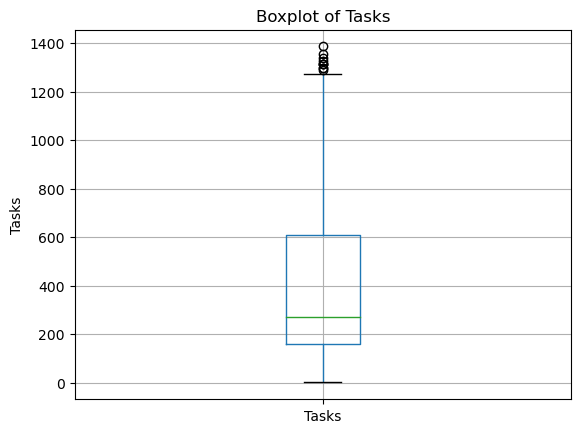

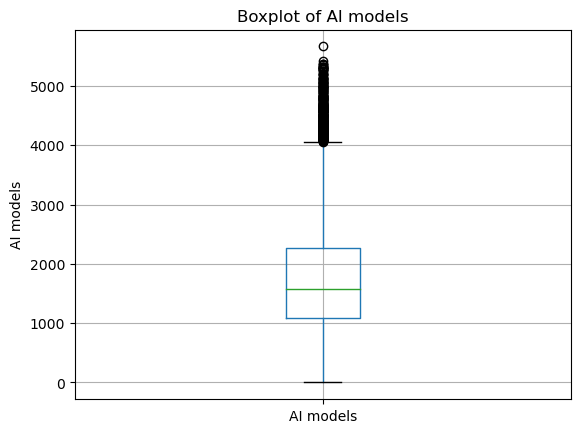

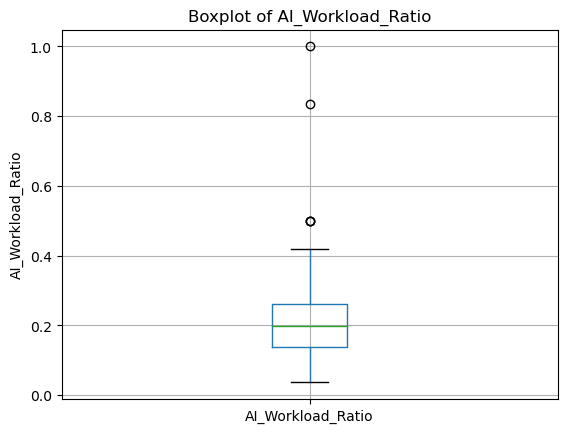

In [391]:
quant_features = ['Tasks', 'AI models', 'AI_Workload_Ratio']
for col in quant_features:
    plt.figure()
    AI_Job_Threat_Index.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [392]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


In [393]:
filtered_df = AI_Job_Threat_Index.copy()
for col in quant_features:
    filtered_df = remove_outliers(filtered_df, col)

filtered_df.columns = filtered_df.columns.str.replace(' ', '_')
filtered_df = filtered_df.rename(columns={'Job_titiles': "Job_titles"})
filtered_df.head()

,Job_titles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


##### Scatter plot: Tasks vs. AI Workload Ratio

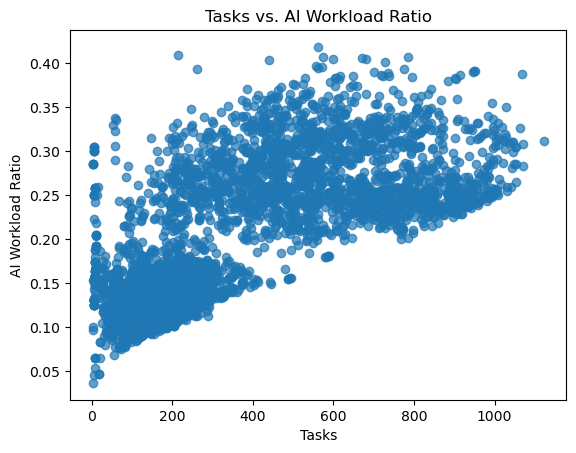

In [394]:
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Tasks vs. AI Workload Ratio")
plt.xlabel("Tasks")
plt.ylabel("AI Workload Ratio")
plt.show()

##### Scatter plot for AI Impact vs. AI_Workload_Ratio

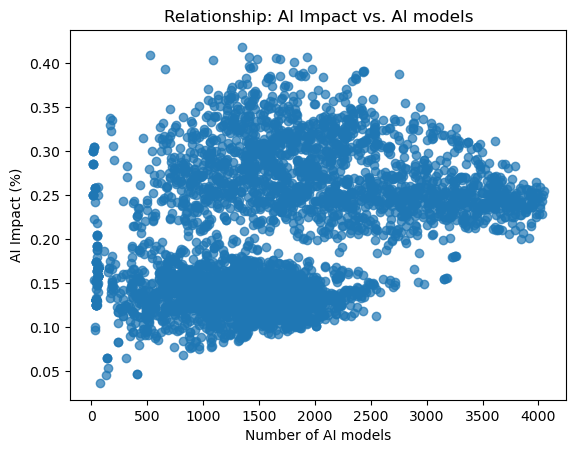

Correlation between AI Impact and AI models: 0.3666787077129089


In [395]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

##### Scatter plot for AI Impact vs. AI models

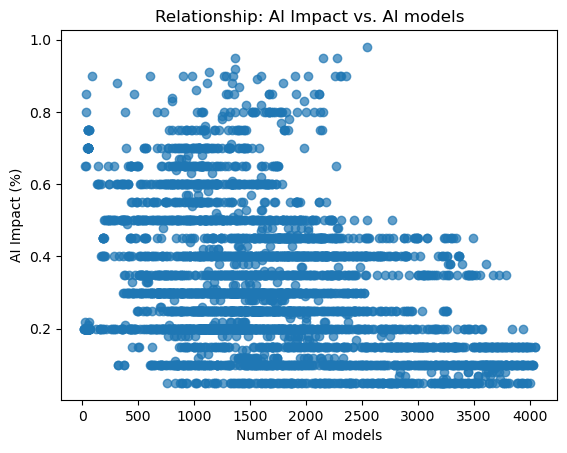

Correlation between AI Impact and AI models: -0.3508933375313581


In [396]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

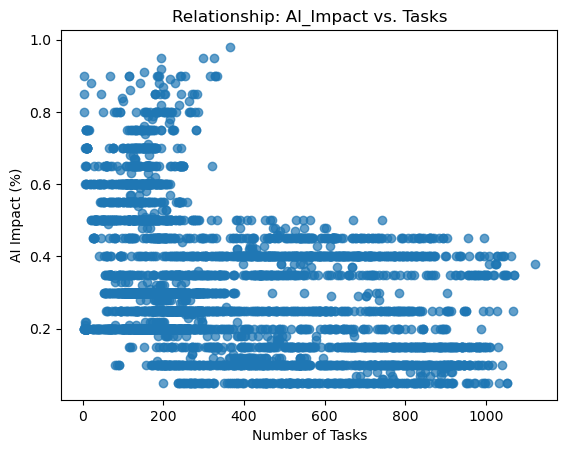

Correlation between AI Impact and Tasks: -0.358320537551422


In [397]:
from scipy.stats import pearsonr
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI_Impact vs. Tasks")
plt.xlabel("Number of Tasks")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(filtered_df['Tasks'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and Tasks:", corr_coef)

### Hypothesis Testing: AI Job Threat Index

In [398]:
filtered_df.head()

,Job_titles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


#### Chi-Squared Test

Test if there is a significant relationship between AI Workload Ratio and AI Impact level.

Null: AI Workload Ratio and AI Impact are independent (i.e., the level of AI reliance in a job does not impact its AI Impact).

Alternate: AI Workload Ratio and AI Impact are dependent (i.e., jobs with higher AI Workload Ratios tend to have higher AI Impact scores)


In [399]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

threshold = 0.5
filtered_df["AI_Impact_Binary"] = filtered_df["AI_Impact"].apply(lambda x: "High" if x >= threshold else "Low")

filtered_df["AI_Workload_Category"] = pd.qcut(filtered_df["AI_Workload_Ratio"], q=3, labels=["Low", "Medium", "High"])

contingency_table = pd.crosstab(filtered_df["AI_Workload_Category"], filtered_df["AI_Impact_Binary"])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test: AI Workload Ratio vs. AI Impact")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: Reject Null. \nAI Workload Ratio is significantly associated with AI Impact level.")
else:
    print("Conclusion: Fail to reject Null. No significant relationship between AI Workload Ratio and AI Impact.")


Chi-Square Test: AI Workload Ratio vs. AI Impact
Chi-Square Statistic: 990.9796
P-Value: 0.0000

Conclusion: Reject Null. 
AI Workload Ratio is significantly associated with AI Impact level.


#### Mann-Whitney U Test
Test whether jobs with more tasks tend to have significantly different AI Impact scores than jobs with fewer tasks.

Null: The distribution of AI Impact is the same for jobs with high vs. low task complexity.

Alternate: The AI Impact distribution differs between jobs with high vs. low task complexity.

Note that we split jobs into two groups: low-task complexity (jobs with below-median tasks) vs high-task complexity (jobs with above-median tasks). Then, we run the Mann-Whitney U Test.

Mann-Whitney U Test: AI Impact vs. Job Complexity (Tasks)
Median Split (Task Complexity Threshold): 252.0
U-Statistic: 3418598.5000
P-Value: 0.0000

Conclusion: Reject Null. 
AI Impact is significantly different between low-task and high-task jobs.


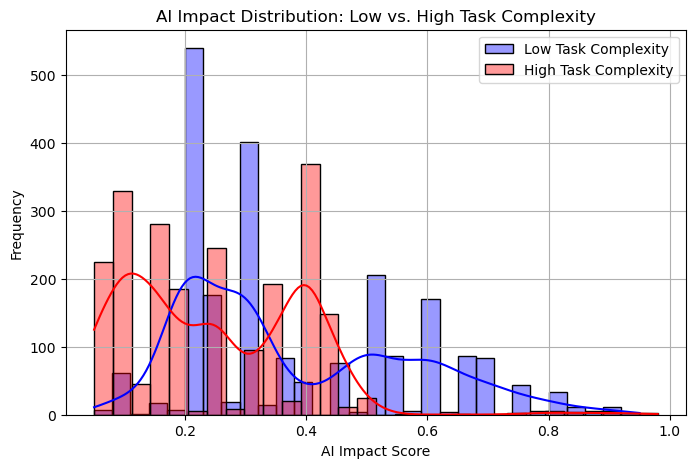

In [400]:
median_tasks = filtered_df["Tasks"].median()

low_task_jobs = filtered_df[filtered_df["Tasks"] <= median_tasks]["AI_Impact"]
high_task_jobs = filtered_df[filtered_df["Tasks"] > median_tasks]["AI_Impact"]

mwu_stat, mwu_p_value = stats.mannwhitneyu(low_task_jobs, high_task_jobs, alternative="two-sided")

print("Mann-Whitney U Test: AI Impact vs. Job Complexity (Tasks)")
print(f"Median Split (Task Complexity Threshold): {median_tasks}")
print(f"U-Statistic: {mwu_stat:.4f}")
print(f"P-Value: {mwu_p_value:.4f}")


if mwu_p_value < 0.05:
    print("\nConclusion: Reject Null. \nAI Impact is significantly different between low-task and high-task jobs.")
else:
    print("Conclusion: Fail to reject Null. No significant difference in AI Impact based on task complexity.")


plt.figure(figsize=(8, 5))
sns.histplot(low_task_jobs, bins=30, kde=True, label="Low Task Complexity", alpha=0.4, color='blue')
sns.histplot(high_task_jobs, bins=30, kde=True, label="High Task Complexity", alpha=0.4, color='red')
plt.xlabel("AI Impact Score")
plt.ylabel("Frequency")
plt.title("AI Impact Distribution: Low vs. High Task Complexity")
plt.legend()
plt.grid(True)
plt.show()


#### K-S Test
See if very distinct job domains have significantly different AI Impact distributions. In this test, we will use `Data & IT` and `Construction`.

Null: The AI Impact distribution is the same across very different job domains.

Alternate: The AI Impact distribution differs between job domains.

In [401]:
filtered_df["Domain"].unique()

['Communication & PR', 'Data & IT', 'Administrative & Clerical', 'Leadership & Strategy', 'Medical & Healthcare', 'Supply Chain & Logistics', 'Law Enforcement', 'Construction', 'Sales & Marketing', 'Hospitality']
Categories (10, object): ['Administrative & Clerical', 'Communication & PR', 'Construction', 'Data & IT', ..., 'Leadership & Strategy', 'Medical & Healthcare', 'Sales & Marketing', 'Supply Chain & Logistics']

Kolmogorov-Smirnov (K-S) Test: AI Impact Distribution Across Job Domains
Comparing: Data & IT vs. Construction
K-S Statistic: 0.0156
P-Value: 1.0000

Conclusion: Fail to reject Null. 
No significant difference in AI Impact distributions between 
two distinctly different job domains.


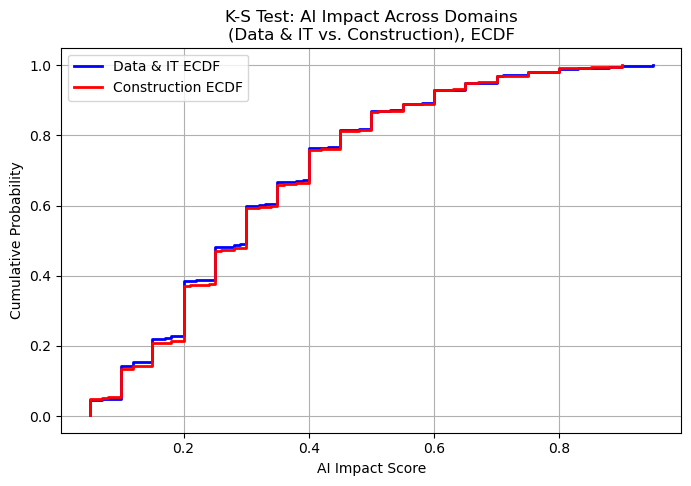

In [402]:
from scipy.stats import ks_2samp
import numpy as np
import matplotlib.pyplot as plt

domain_1 = "Data & IT"
domain_2 = "Construction"

ai_impact_domain_1 = filtered_df[filtered_df["Domain"] == domain_1]["AI_Impact"]
ai_impact_domain_2 = filtered_df[filtered_df["Domain"] == domain_2]["AI_Impact"]

ks_stat, ks_p_value = ks_2samp(ai_impact_domain_1, ai_impact_domain_2)

print("Kolmogorov-Smirnov (K-S) Test: AI Impact Distribution Across Job Domains")
print(f"Comparing: {domain_1} vs. {domain_2}")
print(f"K-S Statistic: {ks_stat:.4f}")
print(f"P-Value: {ks_p_value:.4f}")

# 
if ks_p_value < 0.05:
    print(f"Conclusion: Reject Null. AI Impact distributions are significantly different between {domain_1} and {domain_2}.")
else:
    print(f"\nConclusion: Fail to reject Null. \nNo significant difference in AI Impact distributions between \ntwo distinctly different job domains.")

ai_sorted_1 = np.sort(ai_impact_domain_1)
ai_sorted_2 = np.sort(ai_impact_domain_2)
ecdf_1 = np.arange(1, len(ai_sorted_1) + 1) / len(ai_sorted_1)
ecdf_2 = np.arange(1, len(ai_sorted_2) + 1) / len(ai_sorted_2)

plt.figure(figsize=(8, 5))
plt.plot(ai_sorted_1, ecdf_1, label=f"{domain_1} ECDF", drawstyle='steps-post', lw=2, color="blue")
plt.plot(ai_sorted_2, ecdf_2, label=f"{domain_2} ECDF", drawstyle='steps-post', lw=2, color="red")
plt.xlabel("AI Impact Score")
plt.ylabel("Cumulative Probability")
plt.title(f"K-S Test: AI Impact Across Domains\n({domain_1} vs. {domain_2}), ECDF")
plt.legend()
plt.grid(True)
plt.show()


The K-S Test above makes sense, as there is no difference in AI Impact distributions regardless of domain. AI_Impact is similar across all domains. See below:

In [403]:
filtered_df.groupby('Domain').mean()

,AI_Impact,Tasks,AI_models,AI_Workload_Ratio
Domain,,,,
Administrative & Clerical,0.315385,352.149321,1643.144796,0.200763
Communication & PR,0.312650,364.610245,1706.830735,0.198257
Construction,0.317195,357.301149,1641.908046,0.201529
Data & IT,0.313978,352.991011,1660.842697,0.197483
Hospitality,0.314432,369.000000,1689.579545,0.201792
Law Enforcement,0.312387,364.290541,1636.671171,0.207713
Leadership & Strategy,0.316316,345.414188,1614.224256,0.201174
Medical & Healthcare,0.312815,346.315315,1609.315315,0.201840
Sales & Marketing,0.315950,363.919908,1673.643021,0.202119


### Feature Selection, OLS Regression Modeling (AI Job Threat Index)

In [404]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic 
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for i in already_selected_columns:
        new_columns = already_selected_columns - {i}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
        else:
            formula = f'{response} ~ 1'
        # formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = i
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential, current = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current <= best:
            already_selected_columns = already_selected_columns - {potential}
            best = current
            print(f'Criterion: {best}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

backward_vars = backward(filtered_df[['Tasks', 'AI_models', 'AI_Workload_Ratio', "AI_Impact"]], criterion, "AI_Impact")
backward_vars

{'AI_Workload_Ratio', 'AI_models', 'Tasks'}

In [405]:
covariate = ' + '.join(backward_vars)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     279.0
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          7.35e-166
Time:                        16:04:32   Log-Likelihood:                 1652.0
No. Observations:                4420   AIC:                            -3296.
Df Residuals:                    4416   BIC:                            -3270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6260      0.01

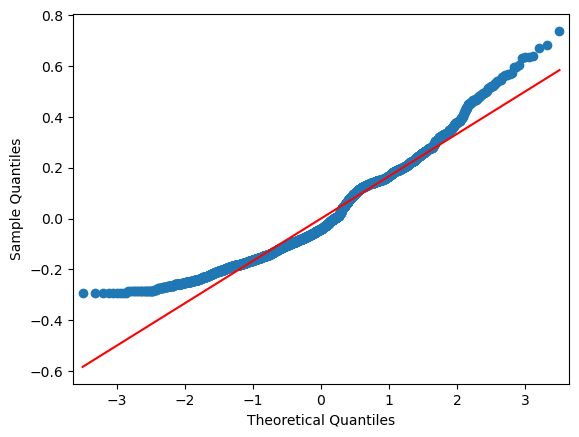

In [406]:
sm.qqplot(model.resid, line ='s');

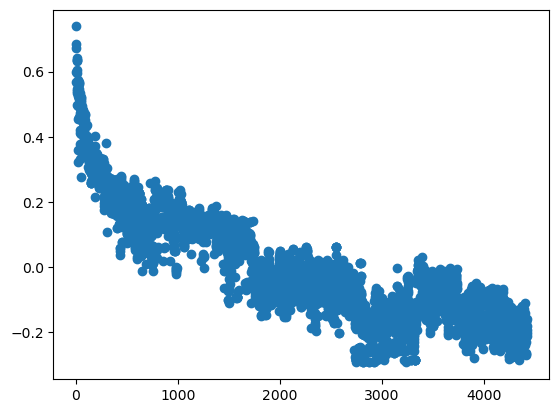

In [407]:
r = model.resid
plt.scatter(range(len(r)), r);

In [408]:
exog = model.model.exog
names = model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: Tasks:  30.554
VIF: AI_models:  17.423
VIF: AI_Workload_Ratio:  7.181


In [409]:
df_vif = filtered_df[['AI_models', 'AI_Workload_Ratio']]
covariate = ' + '.join(df_vif)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     382.6
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          5.74e-154
Time:                        16:04:36   Log-Likelihood:                 1621.4
No. Observations:                4420   AIC:                            -3237.
Df Residuals:                    4417   BIC:                            -3218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4953      0.00

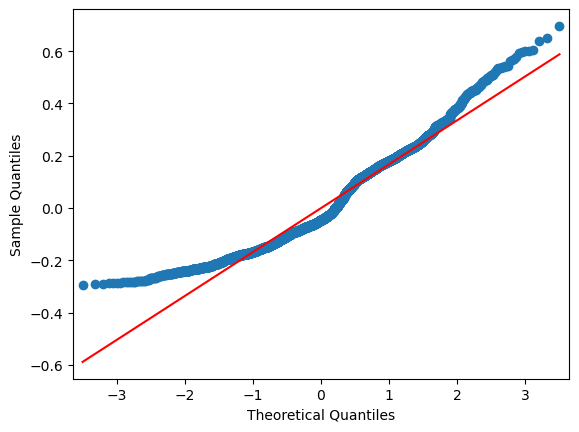

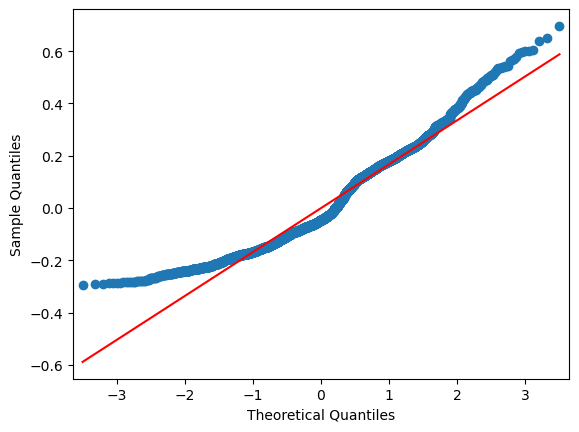

In [410]:
sm.qqplot(model.resid, line ='s')

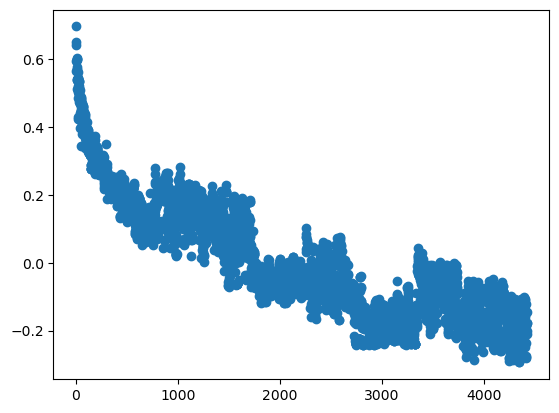

In [411]:
r = model.resid
plt.scatter(range(len(r)), r);

In [412]:
df_vif = filtered_df[['AI_Workload_Ratio']]
covariate = ' + '.join(df_vif)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     359.7
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           3.53e-77
Time:                        16:04:43   Log-Likelihood:                 1441.3
No. Observations:                4420   AIC:                            -2879.
Df Residuals:                    4418   BIC:                            -2866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4460      0.00

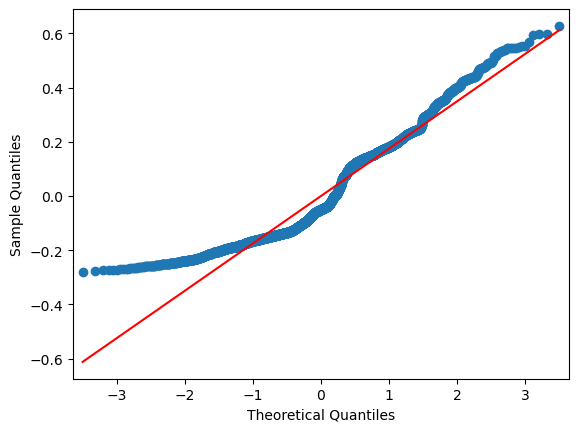

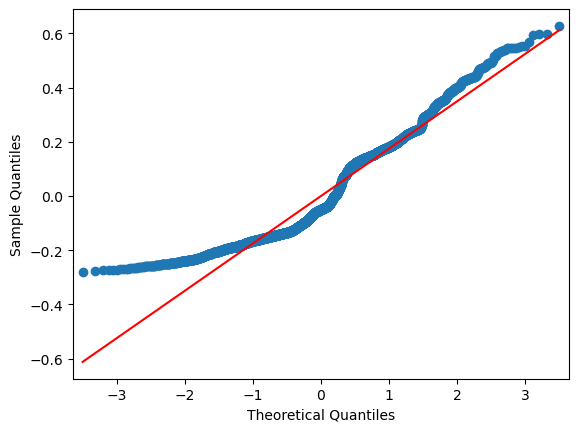

In [413]:
sm.qqplot(model.resid, line ='s')

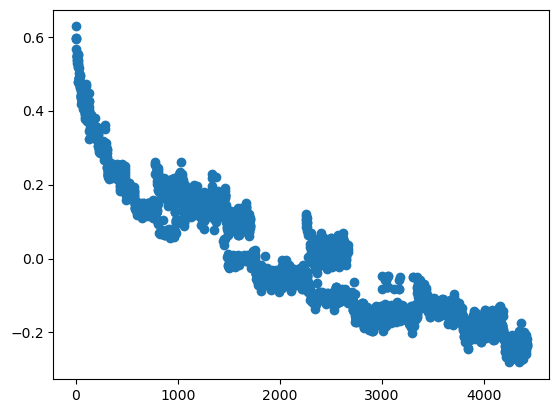

In [414]:
r = model.resid
plt.scatter(range(len(r)), r);